In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tqdm.notebook import tqdm

In [9]:
trainpath="D:/level 3 cs/selected_2 project/selected_project/dataset/train"
testpath="D:/level 3 cs/selected_2 project/selected_project/dataset/test"

In [10]:
for folder in os.listdir(trainpath):
    files=gb.glob(pathname=str(trainpath+'/'+folder+'/*.jpg'))
    print(f'for training data ,found {len(files)} in folder {folder}')

for training data ,found 480 in folder ain
for training data ,found 480 in folder alef
for training data ,found 480 in folder beh
for training data ,found 480 in folder dad
for training data ,found 480 in folder dal
for training data ,found 480 in folder feh
for training data ,found 480 in folder ghain
for training data ,found 480 in folder hah
for training data ,found 480 in folder heh
for training data ,found 480 in folder jeem
for training data ,found 480 in folder kaf
for training data ,found 480 in folder khah
for training data ,found 480 in folder lam
for training data ,found 480 in folder meem
for training data ,found 480 in folder noon
for training data ,found 480 in folder qaf
for training data ,found 480 in folder reh
for training data ,found 480 in folder sad
for training data ,found 480 in folder seen
for training data ,found 480 in folder sheen
for training data ,found 480 in folder tah
for training data ,found 480 in folder teh
for training data ,found 480 in folder thal


In [11]:
for folder in os.listdir(testpath):
    files=gb.glob(pathname=str(testpath+'/'+folder+'/*.jpg'))
    print(f'for training data ,found {len(files)} in folder {folder}')

for training data ,found 120 in folder ain
for training data ,found 120 in folder alef
for training data ,found 120 in folder beh
for training data ,found 120 in folder dad
for training data ,found 120 in folder dal
for training data ,found 120 in folder feh
for training data ,found 120 in folder ghain
for training data ,found 120 in folder hah
for training data ,found 120 in folder heh
for training data ,found 120 in folder jeem
for training data ,found 120 in folder kaf
for training data ,found 120 in folder khah
for training data ,found 120 in folder lam
for training data ,found 120 in folder meem
for training data ,found 120 in folder noon
for training data ,found 120 in folder qaf
for training data ,found 120 in folder reh
for training data ,found 120 in folder sad
for training data ,found 120 in folder seen
for training data ,found 120 in folder sheen
for training data ,found 120 in folder tah
for training data ,found 120 in folder teh
for training data ,found 120 in folder thal


In [12]:
alphabet={'alef':0,'beh':1,'teh':2,'theh':3,'jeem':4,'hah':5,'khah':6,'dal':7,
          'thal':8,'reh':9,'zain':10,'seen':11,'sheen':12,'sad':13,'dad':14,'tah':15,
          'zah':16,'ain':17,'ghain':18,'feh':19,'qaf':20,'kaf':21,'lam':22,'meem':23,
          'noon':24,'heh':25,'waw':26,'yeh':27}

def get_code(n):
    for x,y in alphabet.items():
        if n==y:
            return x
        

In [13]:
x_train=[]
y_train=[]
s=64
for folder in tqdm(os.listdir(trainpath)):
    
    files=gb.glob(pathname=str(trainpath+'/'+folder+'/*.jpg'))
    
    for file in files:
        image=cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_array=cv2.resize(image,(s,s))
        image_array=np.reshape(image_array,(64,64,1))
        x_train.append(list(image_array))
        y_train.append(alphabet[folder])
    
x_train=np.array(x_train)
y_train=np.array(y_train)

In [14]:
x_test=[]
y_test=[]
s=64
for folder in tqdm(os.listdir(testpath)):
    
    files=gb.glob(pathname=str(testpath+'/'+folder+'/*.jpg'))
    
    for file in files:
        image=cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_array=cv2.resize(image,(s,s))
        image_array=np.reshape(image_array,(64,64,1))
        x_test.append(list(image_array))
        y_test.append(alphabet[folder])
    
x_test=np.array(x_test)
y_test=np.array(y_test)

In [15]:
x_train=x_train/255.0
x_test=x_test/255.0

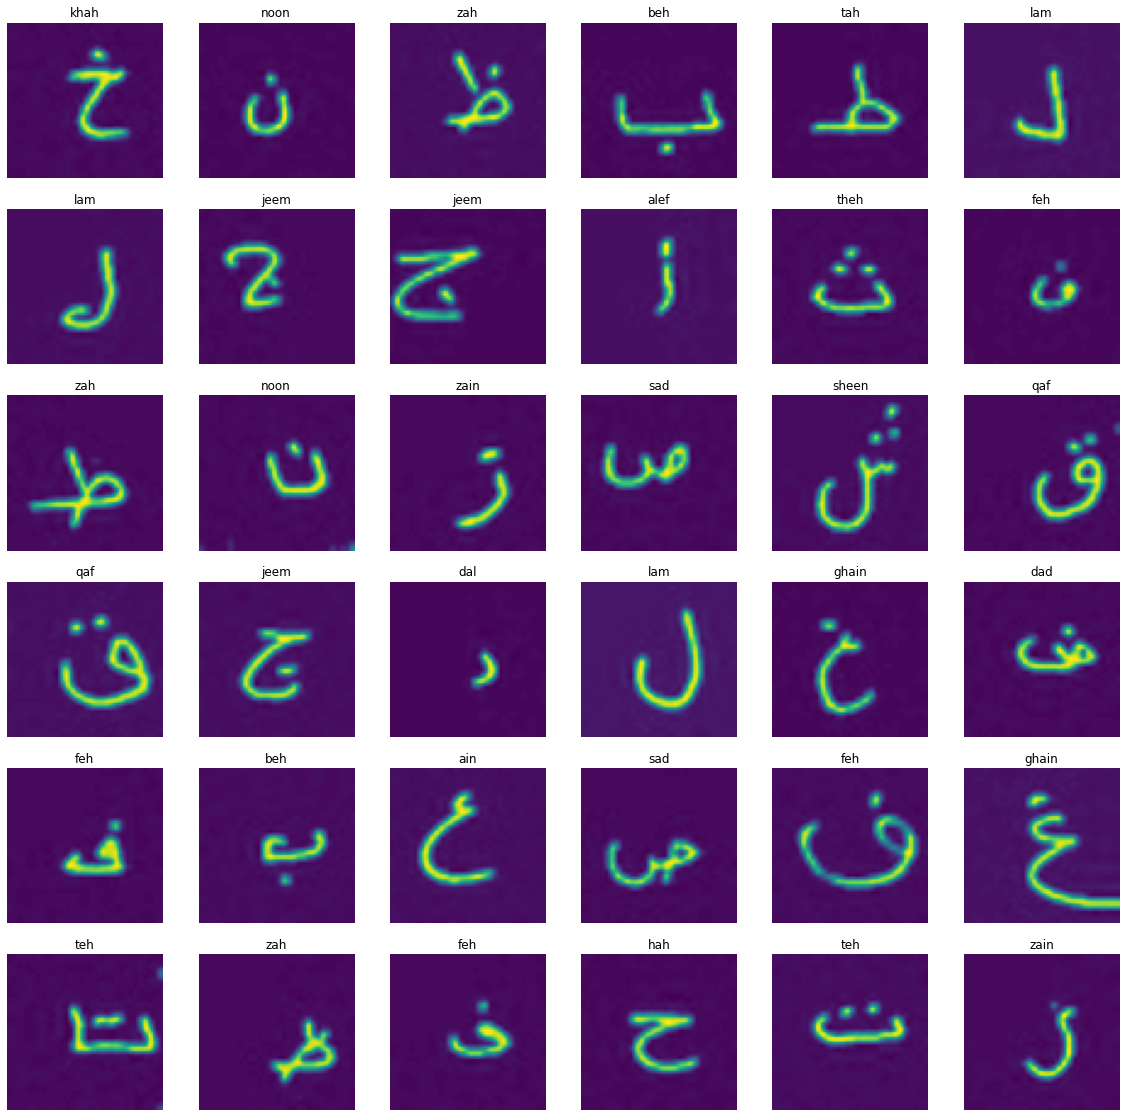

In [31]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1) 
    plt.imshow(x_train[i].reshape(64,64))
    plt.axis('off')
    plt.title(get_code(y_train[i]))


In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13440, 64, 64, 1), (13440,), (3360, 64, 64, 1), (3360,))

In [17]:
from tensorflow.keras.utils import to_categorical
# one hot encoding
number_of_classes = 28
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [18]:
from sklearn import model_selection
x_train,x_valid,y_train,y_valid=model_selection.train_test_split(x_train,y_train,test_size=.30,random_state=42)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(28, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

In [36]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

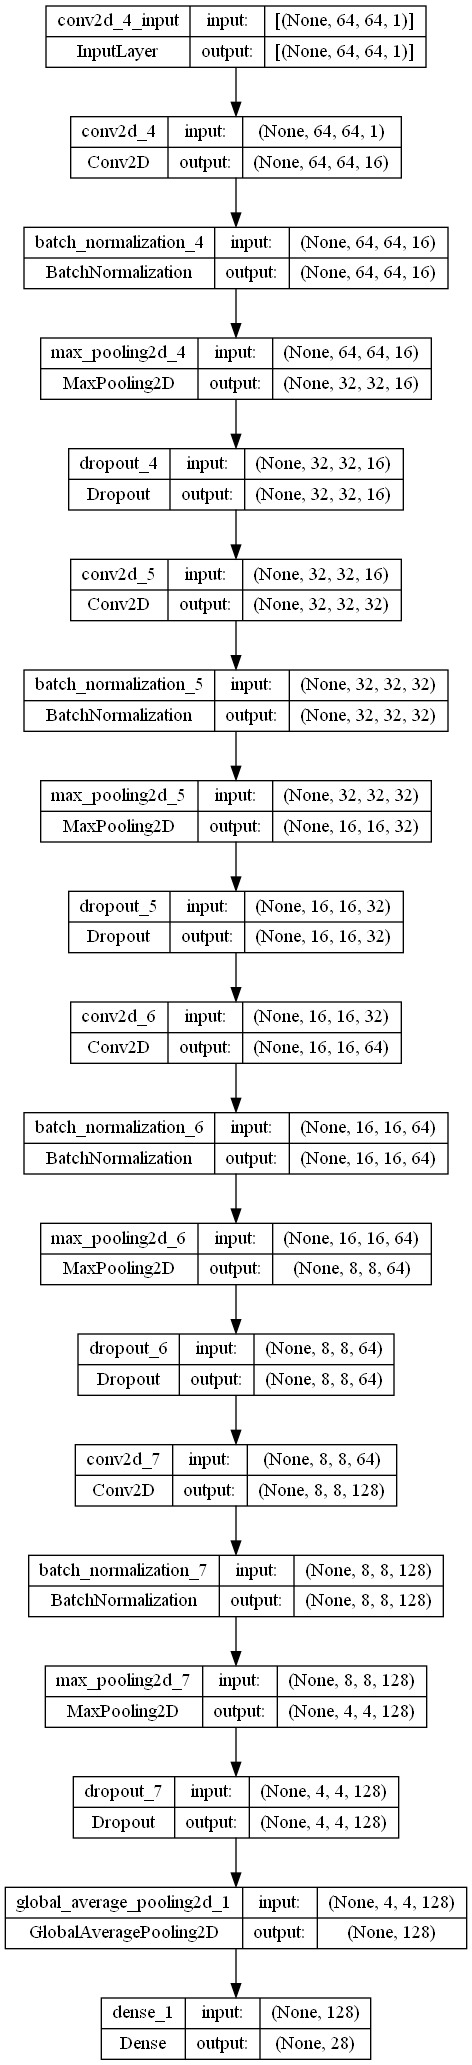

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

In [37]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

In [66]:
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=50, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/50
470/471 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9914
Epoch 1: val_loss improved from inf to 0.39137, saving model to weights.hdf5
471/471 [==============================] - 31s 65ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.3914 - val_accuracy: 0.8715
Epoch 2/50
470/471 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9919
Epoch 2: val_loss improved from 0.39137 to 0.11837, saving model to weights.hdf5
471/471 [==============================] - 31s 65ms/step - loss: 0.0219 - accuracy: 0.9919 - val_loss: 0.1184 - val_accuracy: 0.9752
Epoch 3/50
470/471 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9915
Epoch 3: val_loss did not improve from 0.11837
471/471 [==============================] - 31s 65ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.1920 - val_accuracy: 0.9497
Epoch 4/50
470/471 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9926
Epoch 4: val

In [67]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'r',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

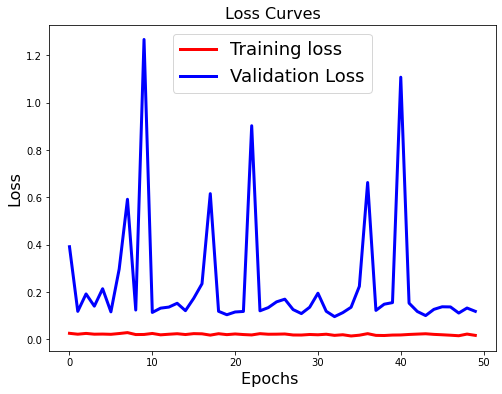

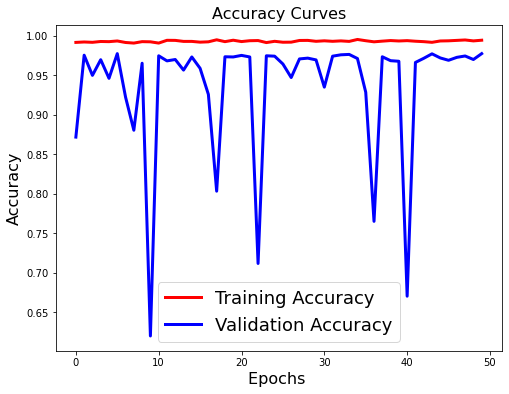

In [68]:
plot_loss_accuracy(history)

In [69]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 2s 18ms/step - loss: 0.1369 - accuracy: 0.9777
Test Accuracy: 0.9776785969734192
Test Loss: 0.13688744604587555


In [70]:
y_pred=model.predict(x_test)
print("Test Loss: {}".format(y_pred.shape))

105/105 [==============================] - 2s 19ms/step
Test Loss: (3360, 28)


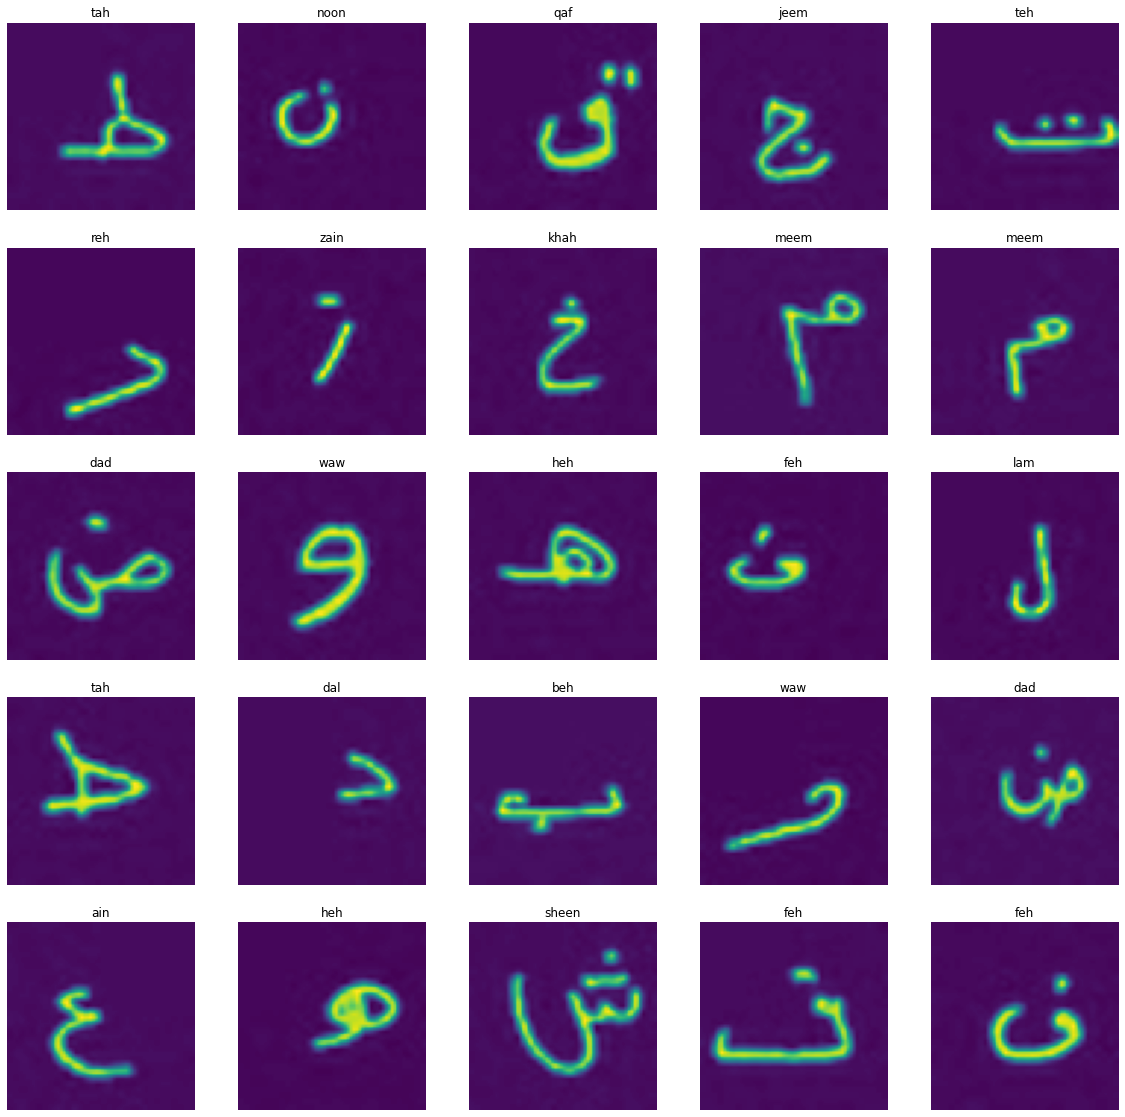

In [71]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(x_test),25))):
    plt.subplot(5,5,n+1) 
    plt.imshow(x_test[i].reshape(64,64))
    plt.axis('off')
    plt.title(get_code(np.argmax(y_pred[i])))

In [27]:
def get_predicted_classes(model, x_test, y_test=None):
  image_predictions = model.predict(x_test)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(y_test, axis=1)
  return predicted_classes, true_classes

In [28]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

In [29]:
#evaluating classification report to calculate precision and recall  
y_pred, y_true = get_predicted_classes(model, x_test, y_test)
get_classification_report(y_true, y_pred)

105/105 [==============================] - 4s 39ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       1.00      1.00      1.00       120
           2       0.96      0.99      0.98       120
           3       0.99      0.96      0.97       120
           4       0.99      0.98      0.99       120
           5       0.97      0.99      0.98       120
           6       1.00      0.98      0.99       120
           7       0.97      0.95      0.96       120
           8       0.94      0.93      0.93       120
           9       0.92      1.00      0.96       120
          10       0.96      0.91      0.93       120
          11       1.00      0.97      0.98       120
          12       0.99      1.00      1.00       120
          13       0.93      1.00      0.96       120
          14       1.00      0.96      0.98       120
          15       0.97      1.00      0.98       120
          16       1.00  

In [31]:
# Save the model
model.save("modelCNN_AHCR.h5")

In [2]:
# Load the saved model
model = tf.keras.models.load_model("modelCNN_AHCR.h5")